# Лабораторна робота 4

Імпортуємо потрібні бібліотеки

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

Завантажуємо датасет

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

Створюємо масив з назвами класів

In [4]:
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Беремо останні 5000 зображень для валідації та тренування

In [5]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

Створюємо датасети для тренування, тестування та валідації

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

Metal device set to: Apple M1


In [7]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    return image, label

In [8]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [9]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

Ствоюємо модель

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


Компілюємо модель

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 64)       256       
 hNormalization)                                                 
                                                        

Тренуємо модель

In [12]:
history = model.fit(train_ds,
                    epochs=50,
                    validation_data=validation_ds,
                    validation_freq=1)

Epoch 1/50


2023-05-04 13:05:09.913634: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1406/1406 [==============================] - 23s 16ms/step - loss: 2.3427 - accuracy: 0.2198 - val_loss: 1.8289 - val_accuracy: 0.3724
Epoch 2/50
1406/1406 [==============================] - 18s 12ms/step - loss: 1.8928 - accuracy: 0.3219 - val_loss: 1.6457 - val_accuracy: 0.4361
Epoch 3/50
1406/1406 [==============================] - 18s 13ms/step - loss: 1.7311 - accuracy: 0.3786 - val_loss: 1.5301 - val_accuracy: 0.4702
Epoch 4/50
1406/1406 [==============================] - 18s 12ms/step - loss: 1.6198 - accuracy: 0.4181 - val_loss: 1.4396 - val_accuracy: 0.5004
Epoch 5/50
1406/1406 [==============================] - 18s 12ms/step - loss: 1.5334 - accuracy: 0.4521 - val_loss: 1.3696 - val_accuracy: 0.5300
Epoch 6/50
1406/1406 [==============================] - 18s 12ms/step - loss: 1.4605 - accuracy: 0.4809 - val_loss: 1.3183 - val_accuracy: 0.5437
Epoch 7/50
1406/1406 [==============================] - 18s 12ms/step - loss: 1.4012 - accuracy: 0.5000 - val_loss: 1.2791 - val_accura

Створюємо функцію для візуалізації результатів

In [13]:
def visualize_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, acc, label='Тренування', color='red')
    plt.plot(epochs, val_acc, label='Валідація')
    plt.title('Точність тренування та валідації')
    plt.legend()
    plt.grid()

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Тренування', color='red')
    plt.plot(epochs, val_loss, label='Валідація')
    plt.title('Витрати тренування та валідації')
    plt.legend()
    plt.grid()

    plt.show()

Візуалізуємо результати

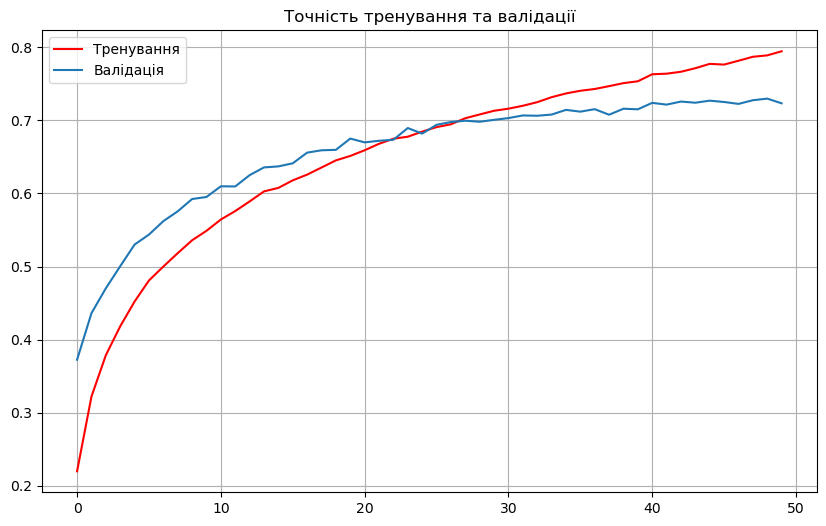

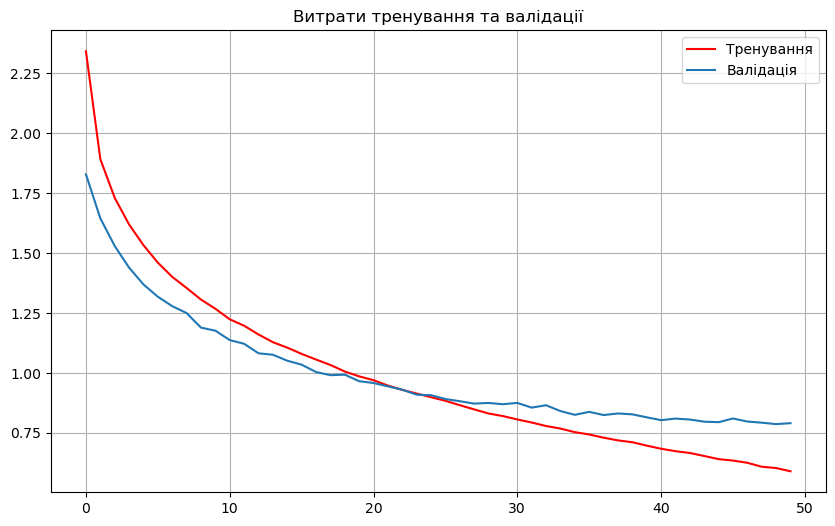

In [14]:
visualize_history(history)

Виводимо перші 10 зображень та їх класи

1/1 [==============================] - 0s 50ms/step


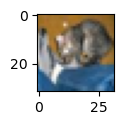

Predicted:cat
True:cat


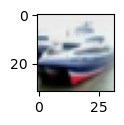

Predicted:truck
True:ship


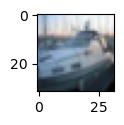

Predicted:truck
True:ship


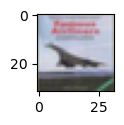

Predicted:truck
True:airplane


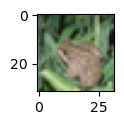

Predicted:cat
True:frog


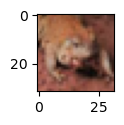

Predicted:frog
True:frog


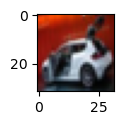

Predicted:automobile
True:automobile


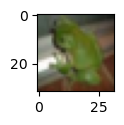

Predicted:ship
True:frog


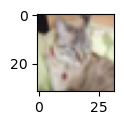

Predicted:cat
True:cat


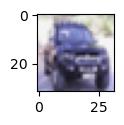

Predicted:truck
True:automobile


In [27]:
predicted_labels = [CLASS_NAMES[y.argmax()] for y in model.predict(test_images[:10])]
true_labels = [CLASS_NAMES[label[0]] for label in test_labels[:10]]
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(test_images[i])
    plt.show()
    print("Predicted:" + predicted_labels[i])
    print("True:" + true_labels[i])